# Information about further work
In this work student performance is going to be predicted by information of their ethnicity, parental level of education, lunch and preparation before the test. Thousand results are given.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [4]:
data.rename(columns = {'race/ethnicity': 'ethn', 'parental level of education': 'par_edu',
                       'test preparation course': 'prep', 'math score': 'math', 
                       'reading score': 'reading', 'writing score': 'writing'}, inplace = True)
data.head(7)

,gender,ethn,par_edu,lunch,prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [5]:
data['overall'] = data.math + data.writing + data.reading  # new column for overall scores out of 300
data.head()

,gender,ethn,par_edu,lunch,prep,math,reading,writing,overall
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


## Hypothesis
This work believes:
1. parental education would affect performance of children, and examinees with parents with master's degree would have better results
2. people who had had their lunches eaten and preparation done before test would perform better
3. males would be better in math, and reading results would be somewhat equal for both women and men, also, results of writing would be higher for women 
4. overall, reading would be the best result for all participants, and math is the worst

## General transcribing
In this block it is checked what mean, median, standard deviation, maximum and minimum scores are in each section of the exam (+overall scores).

In [12]:
print('Mean of math score:', data.math.mean())  # calculating mean scores for all 3 tests + overall
print('Mean of reading score:', data.reading.mean()) 
print('Mean of writing score:', data.writing.mean())
print('Mean of overall score:', data.overall.mean())

Mean of math score: 66.089
Mean of reading score: 69.169
Mean of writing score: 68.054
Mean of overall score: 203.312


In [13]:
print('Median of math score:', data.math.median())  # calculating median scores for all 3 tests + overall
print('Median of reading score:', data.reading.median()) 
print('Median of writing score:', data.writing.median())
print('Median of overall score:', data.overall.median())

Median of math score: 66.0
Median of reading score: 70.0
Median of writing score: 69.0
Median of overall score: 205.0


In [14]:
print('Standart deviation of math score:', data.math.std())  # calculating standard deviation for all scores
print('Standart deviation of reading score:', data.reading.std()) 
print('Standart deviation of writing score:', data.writing.std())
print('Standart deviation of overall score:', data.overall.std())

Standart deviation of math score: 15.163080096009468
Standart deviation of reading score: 14.60019193725222
Standart deviation of writing score: 15.195657010869642
Standart deviation of overall score: 42.77197795400746


In [15]:
table_1 = data[['math', 'reading', 'writing', 'overall']].agg(['mean', 'median', 'std', 'min', 'max'])
table_1.round(2)

,math,reading,writing,overall
mean,66.09,69.17,68.05,203.31
median,66.00,70.00,69.00,205.00
std,15.16,14.60,15.20,42.77
min,0.00,17.00,10.00,27.00
max,100.00,100.00,100.00,300.00


In [16]:
average_scores = table_1.drop('overall', 1).loc['mean'].mean()
print('Average score for all sections:', round(average_scores, 2))  # what is average score for all sections

Average score for all sections: 67.77


In [17]:
data.loc[data['overall'] == 300]  # how to get 300

,gender,ethn,par_edu,lunch,prep,math,reading,writing,overall
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


So, to get 300 one should preferably:

1. be from group E
2. have parents with bachelor's or associate's degree
3. have standard lunch
4. it's okay not to have preparation

## Simple visualization
In this block there is simple visualization of given data.

In [18]:
plt.style.use('seaborn')

Text(0, 0.5, 'lunch before test')

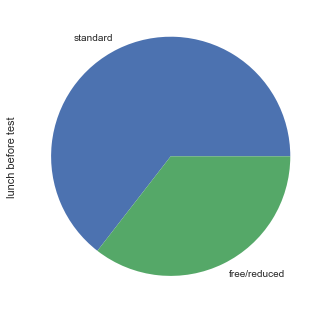

In [19]:
data.lunch.value_counts().plot(kind = 'pie')
plt.ylabel('lunch before test')

Text(0, 0.5, 'test preparation course')

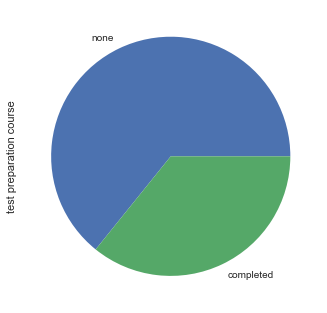

In [20]:
data.prep.value_counts().plot(kind = 'pie')
plt.ylabel('test preparation course')

There were more people who preferred standard lunch to free/reduced one. Many participants abandoned the idea of preparation before the test.

<BarContainer object of 6 artists>

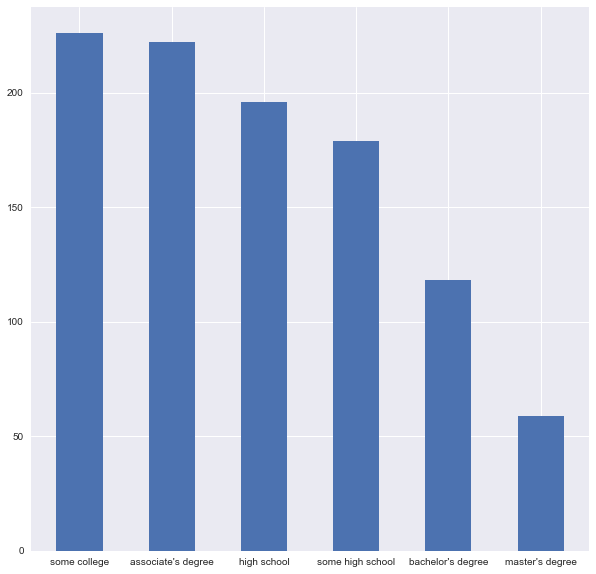

In [21]:
plt.figure(figsize=(10,10))
plt.bar(data.par_edu.value_counts().index,data.par_edu.value_counts().values, width = 0.5)

Taking a closer look at this bar chart, it can be observed most parents of partakers had some college level of education, less of them had chosen to pursue master's degree. 

[Text(0.5, 0, 'overall score'), Text(0, 0.5, 'number of people')]

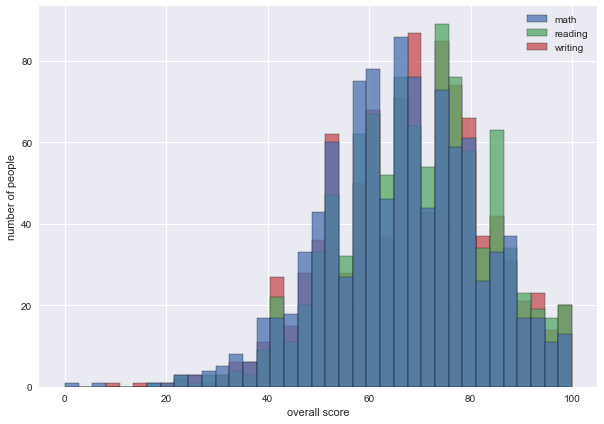

In [22]:
plt.figure(figsize=(10,7))
ax = sns.histplot(data[['math', 'reading', 'writing']])
ax.set(xlabel = 'overall score', ylabel = 'number of people') 

<AxesSubplot:xlabel='0'>

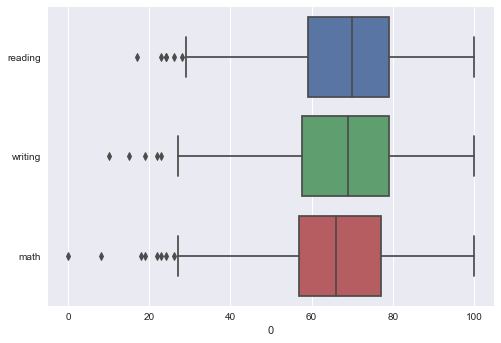

In [23]:
table = data[['reading', 'writing', 'math']]
table = pd.concat([table.reading, table.writing, table.math], axis = 0)
table.index = range(table.shape[0])

table = pd.DataFrame(table)
table[''] = ''

table.loc[:table.shape[0]/3, ''] = 'reading'
table.loc[table.shape[0]/3:2*table.shape[0]/3, ''] = 'writing'
table.loc[2*table.shape[0]/3:, ''] = 'math'

sns.boxplot(data = table, x = 0, y = '')

Reading was quite more comprehensible among respondents and math exam was the most complicated one.

[Text(0.5, 0, 'overall score'), Text(0, 0.5, 'number of people')]

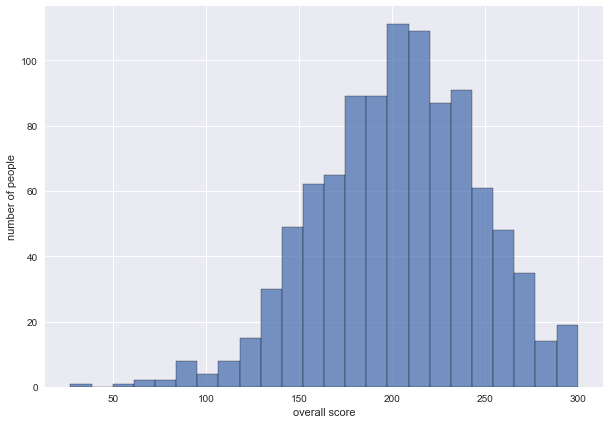

In [24]:
plt.figure(figsize=(10,7))
ax = sns.histplot(data['overall'])
ax.set(xlabel = 'overall score', ylabel = 'number of people') 

The most common scores were approximately from 180 to 240.

## Visualization via comparison
In this block it is observed how different attributes affect student's performance

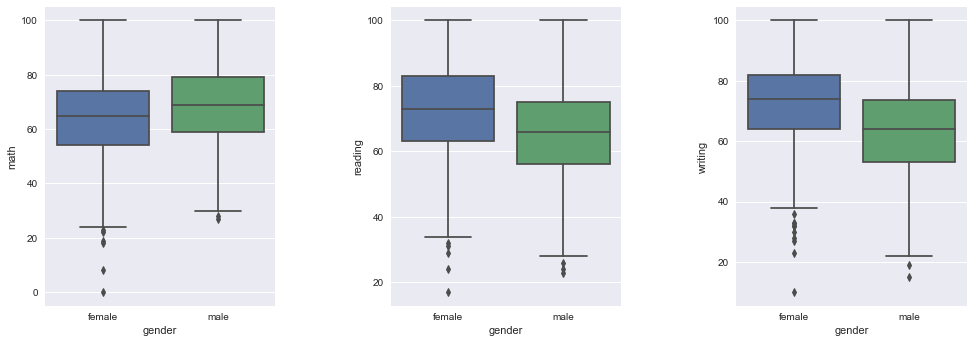

In [25]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace = 0.5, wspace = 0.5, left = 0.1, right = 1.7)
mat_1 = ['math', 'reading', 'writing']

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.boxplot(data.gender, data[mat_1[i]])

From the box plot it is evident that although men performed better in math, female examinees were superior in writing and reading skills.

[Text(0.5, 0, 'race/ethnicity'), Text(0, 0.5, 'overall score')]

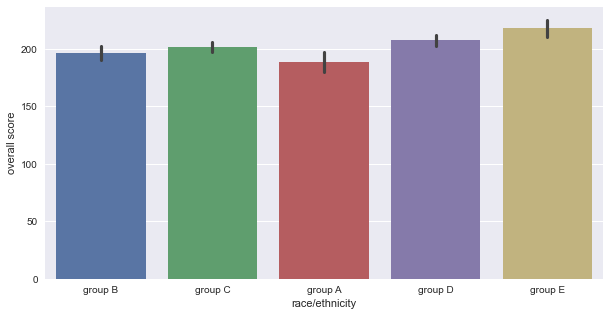

In [26]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data.ethn, data.overall)
ax.set(xlabel = 'race/ethnicity', ylabel = 'overall score') 

Generally, people of group E were better than any other group (more than 200 overall score) and the worst performance is attributed to ethnic group A.

[Text(0.5, 0, 'parental level of education'), Text(0, 0.5, 'overall score')]

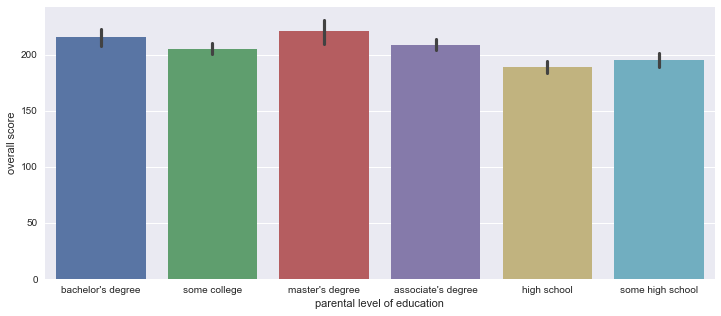

In [27]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data.par_edu, data.overall)
ax.set(xlabel = 'parental level of education', ylabel = 'overall score') 

It was expected that students with parents with master's degrees were more likely to finish the test with better results in comparison with those whose parents hadn't graduated with it. The poorest results (average less than 200) were obtained by the group whose parents just left high school without tertiary education.

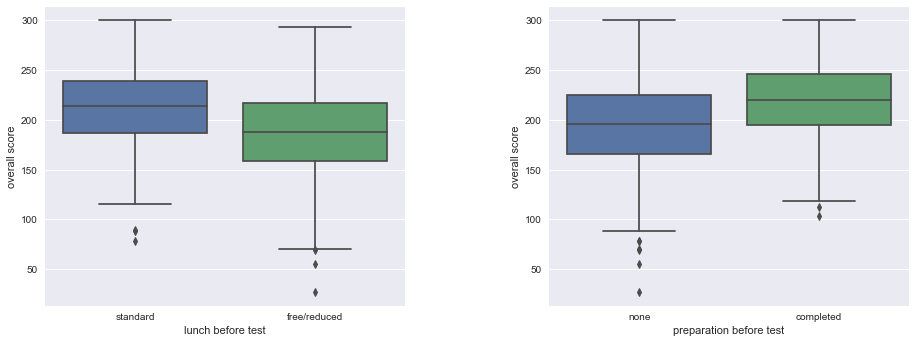

In [28]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace = 0.5, wspace = 0.4, left = 0.2, right = 1.7)
mat_2 = ['lunch', 'prep']
mat_3 = ['lunch before test', 'preparation before test']

for i in range(2):
    ax = plt.subplot(1,2,i+1)
    sns.boxplot(data[mat_2[i]], data.overall)
    ax.set(xlabel = mat_3[i], ylabel = 'overall score') 

Clearly, people who had had lunch before taking the exam, they performed better than ones who hadn't eaten or ate reduced lunch. Moreover, it is transparent that without proper preparation results would be inferior to those people who had have it.

## Conclusion
After deciphering given table this work can conclude that:
1. parental education would affect performance of children, and examinees with parents with master's degree would have better results (as it was predicted)
2. people who had had their lunches eaten and preparation done before test would perform better (as it was predicted)
3. males would be better in math (as it was predicted), and reading results would be somewhat equal for both women and men (as it was not predicted), also, results of writing would be higher for women (as it was predicted)
4. overall, reading would be the best result for all participants, and math is the worst (as it was predicted) 